# United States Hate Crime Analysis

### The Following Script Contains
#### 01. Importing Libraries and Data
#### 02. Wrangling Data
#### 03. Time Series Analysis
#### 04. Testing for Stationarity

### 01. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.

plt.style.use('fivethirtyeight') # This is a styling option for plots

In [2]:
# Create path and import data
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Advanced Analytics & Dashboard Design (Original)\10-2024 American Hate Crime'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'hate_crime_wrangled.csv'))

In [3]:
# Check import
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,8/31/1991,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,9/19/1991,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,7/4/1991,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,12/24/1991,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,12/23/1991,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [5]:
# Drop unnecessary columns
df = df.drop(['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME', 'DIVISION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'LOCATION_NAME', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],axis = 1)

In [6]:
# Check drops
df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME', 'INCIDENT_DATE',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'BIAS_DESC'],
      dtype='object')

In [7]:
# Rename columns
new_names = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'INCIDENT_DATE':'incident_date',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'BIAS_DESC':'prejudice'}

df.rename(columns=new_names,inplace=True)

In [8]:
# confirm rename
df.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,prejudice
0,1991,AR,Arkansas,South,8/31/1991,1,White,1,Intimidation,Anti-Black or African American
1,1991,AR,Arkansas,South,9/19/1991,1,Black or African American,1,Simple Assault,Anti-White
2,1991,AR,Arkansas,South,7/4/1991,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
3,1991,AR,Arkansas,South,12/24/1991,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,1991,AR,Arkansas,South,12/23/1991,1,Black or African American,1,Aggravated Assault,Anti-White


In [9]:
# Check for missing values 
df.isnull().sum()

incident_year     0
state_abbr        0
state_name        0
region_name       0
incident_date     0
offender_count    0
offender_race     0
victim_count      0
offense_type      0
prejudice         0
dtype: int64

In [10]:
# Checking for duplicates
dups = df.duplicated()

In [11]:
dups.shape

(199797,)

In [12]:
# Check top 15 types of bias
(df['prejudice'].value_counts()).sort_values(ascending=False).head(15)

prejudice
Anti-Black or African American                               68751
Anti-Jewish                                                  25376
Anti-White                                                   23311
Anti-Gay (Male)                                              20257
Anti-Hispanic or Latino                                      12817
Anti-Other Race/Ethnicity/Ancestry                           10018
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)     6046
Anti-Asian                                                    5893
Anti-Multiple Races, Group                                    4787
Anti-Lesbian (Female)                                         4262
Anti-Islamic (Muslim)                                         3562
Anti-Other Religion                                           3294
Anti-American Indian or Alaska Native                         2158
Anti-Catholic                                                 1422
Anti-Protestant                                     

In [13]:
# Select top bias groupings
hate_crime_victim = df[(df['prejudice'] == 'Anti-Black or African American') 
         | (df['prejudice'] == 'Anti-Jewish') 
         | (df['prejudice'] == 'Anti-White') 
         | (df['prejudice'] == 'Anti-Gay (Male)') 
         | (df['prejudice'] == 'Anti-Hispanic or Latino') 
         | (df['prejudice'] == 'Anti-Other Race/Ethnicity/Ancestry') 
         | (df['prejudice'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)') 
         | (df['prejudice'] == 'Anti-Asian') 
         | (df['prejudice'] == 'Anti-Lesbian (Female)') 
         | (df['prejudice'] == 'Anti-Islamic (Muslim)')
         | (df['prejudice'] == 'Anti-American Indian/Alaska Native')]

In [14]:
hate_crime_victim.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,prejudice
0,1991,AR,Arkansas,South,8/31/1991,1,White,1,Intimidation,Anti-Black or African American
1,1991,AR,Arkansas,South,9/19/1991,1,Black or African American,1,Simple Assault,Anti-White
2,1991,AR,Arkansas,South,7/4/1991,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
3,1991,AR,Arkansas,South,12/24/1991,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,1991,AR,Arkansas,South,12/23/1991,1,Black or African American,1,Aggravated Assault,Anti-White


In [15]:
# Confirm State Abbreviations
hate_crime_victim[['state_abbr','state_name']].value_counts()

state_abbr  state_name          
CA          California              30823
NJ          New Jersey              17272
NY          New York                17197
MI          Michigan                10191
MA          Massachusetts            9634
OH          Ohio                     7101
TX          Texas                    6847
WA          Washington               6435
AZ          Arizona                  5502
MD          Maryland                 5101
IL          Illinois                 4970
FL          Florida                  4613
VA          Virginia                 4479
MN          Minnesota                4057
OR          Oregon                   3570
CO          Colorado                 3389
TN          Tennessee                3342
PA          Pennsylvania             3200
CT          Connecticut              3136
MO          Missouri                 2812
KY          Kentucky                 2374
NC          North Carolina           1968
IN          Indiana                  1656
S

In [16]:
# Fix abbreviated name for Nebraska
def nb_check(abbr):
    if abbr == 'NB':
        return 'NE'
    else:
        return abbr

In [17]:
# Create new subset using the above check
by_state = hate_crime_victim
by_state['state_abbr'] = by_state['state_abbr'].apply(nb_check)

In [18]:
# Confirm change in subset
by_state[by_state['state_abbr']=='NE']

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,prejudice
38113,1996,NE,Nebraska,Midwest,4/4/1996,1,White,1,Simple Assault,Anti-Hispanic or Latino
38114,1996,NE,Nebraska,Midwest,7/19/1996,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
38115,1996,NE,Nebraska,Midwest,7/21/1996,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
46476,1997,NE,Nebraska,Midwest,7/10/1997,0,Unknown,1,Destruction/Damage/Vandalism of Property,Anti-Jewish
46477,1997,NE,Nebraska,Midwest,10/5/1997,4,White,4,Aggravated Assault,Anti-Other Race/Ethnicity/Ancestry
...,...,...,...,...,...,...,...,...,...,...
196704,2018,NE,Nebraska,Midwest,8/23/2018,0,Unknown,2,Motor Vehicle Theft;Weapon Law Violations,Anti-White
196705,2018,NE,Nebraska,Midwest,8/8/2018,0,Unknown,1,Drug Equipment Violations,Anti-White
196706,2018,NE,Nebraska,Midwest,12/3/2018,0,Unknown,1,Destruction/Damage/Vandalism of Property,Anti-White
196707,2018,NE,Nebraska,Midwest,4/20/2018,0,Unknown,2,Burglary/Breaking & Entering,Anti-White


In [19]:
# Confirm State Abbreviations
hate_crime_victim[['state_abbr','state_name']].value_counts()

state_abbr  state_name          
CA          California              30823
NJ          New Jersey              17272
NY          New York                17197
MI          Michigan                10191
MA          Massachusetts            9634
OH          Ohio                     7101
TX          Texas                    6847
WA          Washington               6435
AZ          Arizona                  5502
MD          Maryland                 5101
IL          Illinois                 4970
FL          Florida                  4613
VA          Virginia                 4479
MN          Minnesota                4057
OR          Oregon                   3570
CO          Colorado                 3389
TN          Tennessee                3342
PA          Pennsylvania             3200
CT          Connecticut              3136
MO          Missouri                 2812
KY          Kentucky                 2374
NC          North Carolina           1968
IN          Indiana                  1656
S

In [20]:
hate_crime_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180293 entries, 0 to 199795
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   incident_year   180293 non-null  int64 
 1   state_abbr      180293 non-null  object
 2   state_name      180293 non-null  object
 3   region_name     180293 non-null  object
 4   incident_date   180293 non-null  object
 5   offender_count  180293 non-null  int64 
 6   offender_race   180293 non-null  object
 7   victim_count    180293 non-null  int64 
 8   offense_type    180293 non-null  object
 9   prejudice       180293 non-null  object
dtypes: int64(3), object(7)
memory usage: 15.1+ MB


In [21]:
# Fix incident date d-type
hate_crime_victim['incident_date'] = pd.to_datetime(hate_crime_victim['incident_date'])

In [22]:
# confirm d-type change
hate_crime_victim.head()

,incident_year,state_abbr,state_name,region_name,incident_date,offender_count,offender_race,victim_count,offense_type,prejudice
0,1991,AR,Arkansas,South,1991-08-31,1,White,1,Intimidation,Anti-Black or African American
1,1991,AR,Arkansas,South,1991-09-19,1,Black or African American,1,Simple Assault,Anti-White
2,1991,AR,Arkansas,South,1991-07-04,1,Black or African American,1,Aggravated Assault,Anti-Black or African American
3,1991,AR,Arkansas,South,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,1991,AR,Arkansas,South,1991-12-23,1,Black or African American,1,Aggravated Assault,Anti-White


In [23]:
hate_crime_victim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180293 entries, 0 to 199795
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   incident_year   180293 non-null  int64         
 1   state_abbr      180293 non-null  object        
 2   state_name      180293 non-null  object        
 3   region_name     180293 non-null  object        
 4   incident_date   180293 non-null  datetime64[ns]
 5   offender_count  180293 non-null  int64         
 6   offender_race   180293 non-null  object        
 7   victim_count    180293 non-null  int64         
 8   offense_type    180293 non-null  object        
 9   prejudice       180293 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 15.1+ MB


### 02. Wrangling Data

In [24]:
#create subset with only incident date and victim count
victims = hate_crime_victim[['incident_date', 'incident_year', 'victim_count']]

In [25]:
victims.head()

,incident_date,incident_year,victim_count
0,1991-08-31,1991,1
1,1991-09-19,1991,1
2,1991-07-04,1991,1
3,1991-12-24,1991,2
4,1991-12-23,1991,1


##### Incident date and year were selected alongside victim count as part of the goal of this analysis was to see the trend of hate crime (victims) over time.

In [26]:
# sort data by year
victims = victims.sort_values(by='incident_date')

In [27]:
# Confirm sorting
victims.head()

,incident_date,incident_year,victim_count
832,1991-01-01,1991,1
2199,1991-01-01,1991,1
4082,1991-01-01,1991,1
262,1991-01-01,1991,2
1152,1991-01-01,1991,2


In [28]:
victims.columns

Index(['incident_date', 'incident_year', 'victim_count'], dtype='object')

In [29]:
# Ser index as incident date
victims.set_index('incident_date')

,incident_year,victim_count
incident_date,,
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-01,1991,2
...,...,...
2018-12-31,2018,1
2018-12-31,2018,1
2018-12-31,2018,1


In [30]:
# import datetime library 
from datetime import datetime

victims['datetime'] = pd.to_datetime(victims['incident_date']) # Create a datetime column from "Date".
victims = victims.set_index('datetime') # Set the datetime as the index of the dataframe.
victims.drop(['incident_date'], axis=1, inplace=True) # Drop the "Date" column.
victims.head()

,incident_year,victim_count
datetime,,
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-01,1991,2


In [59]:
# Check for dupliactes
victims_duplicates = victims[victims.duplicated()]
victims_duplicates.sum()

incident_year    360497304
victim_count        219884
dtype: int64

In [32]:
print(victims_duplicates)

            incident_year  victim_count
datetime                               
1991-01-01           1991             1
1991-01-01           1991             1
1991-01-01           1991             2
1991-01-01           1991             1
1991-01-01           1991             1
...                   ...           ...
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1
2018-12-31           2018             1

[179903 rows x 2 columns]


In [33]:
# remove dupliactes
victims_clean = victims_duplicates.drop_duplicates()

In [34]:
victims_clean.head()

,incident_year,victim_count
datetime,,
1991-01-01,1991,1
1991-01-01,1991,2
1991-01-09,1991,3
1991-01-21,1991,4
1991-02-12,1991,5


In [35]:
# Create new aggregated column for victim count by year
victims_clean['total_victims'] = victims_clean.groupby('datetime')['victim_count'].transform('sum')

In [36]:
# confirm grouping
victims_clean.head()

,incident_year,victim_count,total_victims
datetime,,,
1991-01-01,1991,1,3
1991-01-01,1991,2,3
1991-01-09,1991,3,3
1991-01-21,1991,4,4
1991-02-12,1991,5,5


In [37]:
# Drop unneeded columns
victims_clean=victims_clean.drop(columns=['incident_year','victim_count'])

In [38]:
# check columns dropped
victims_clean.head()

,total_victims
datetime,
1991-01-01,3
1991-01-01,3
1991-01-09,3
1991-01-21,4
1991-02-12,5


In [40]:
%matplotlib inline

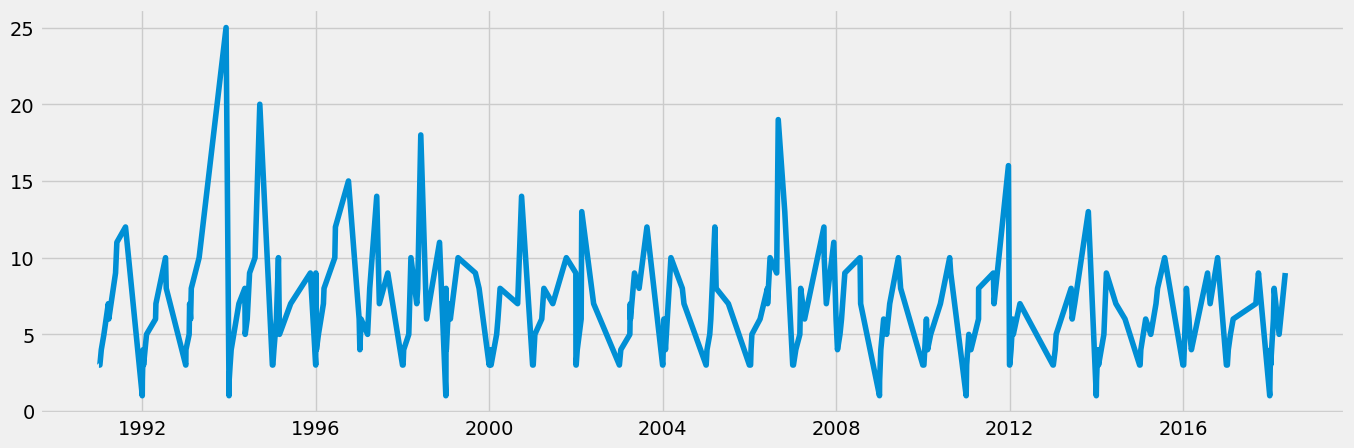

In [47]:
# Plot total crime over time
plt.figure(figsize=(15,5), dpi=100)
plt.plot(victims_clean)
plt.show()

### 03. Time-Series Analysis

In [60]:
# Import library
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
result=seasonal_decompose(victims_clean['total_victims'], model='additive', period=28)

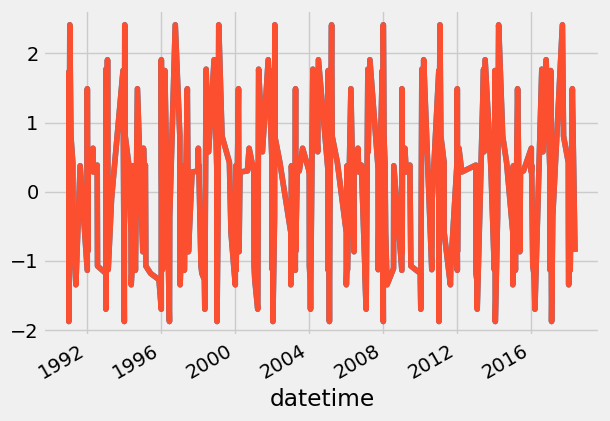

In [63]:
result.seasonal.plot()
plt.show()

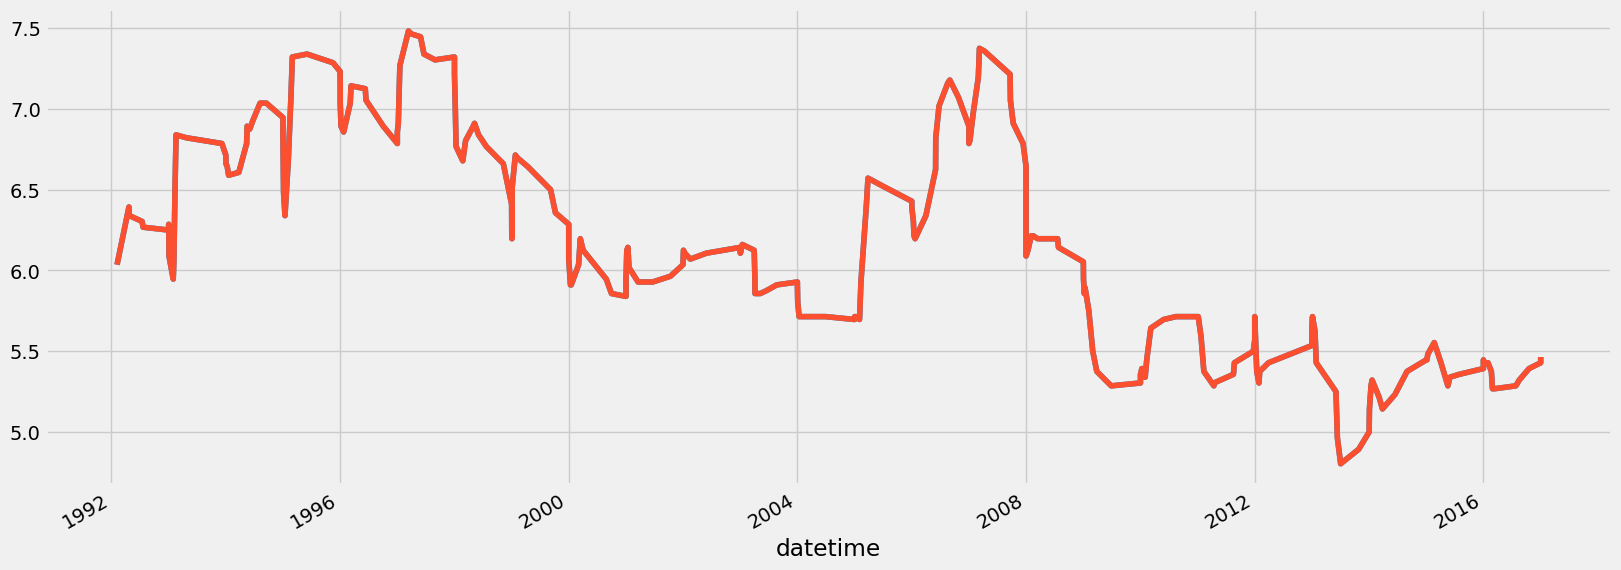

In [71]:
result.trend.plot()
plt.show()

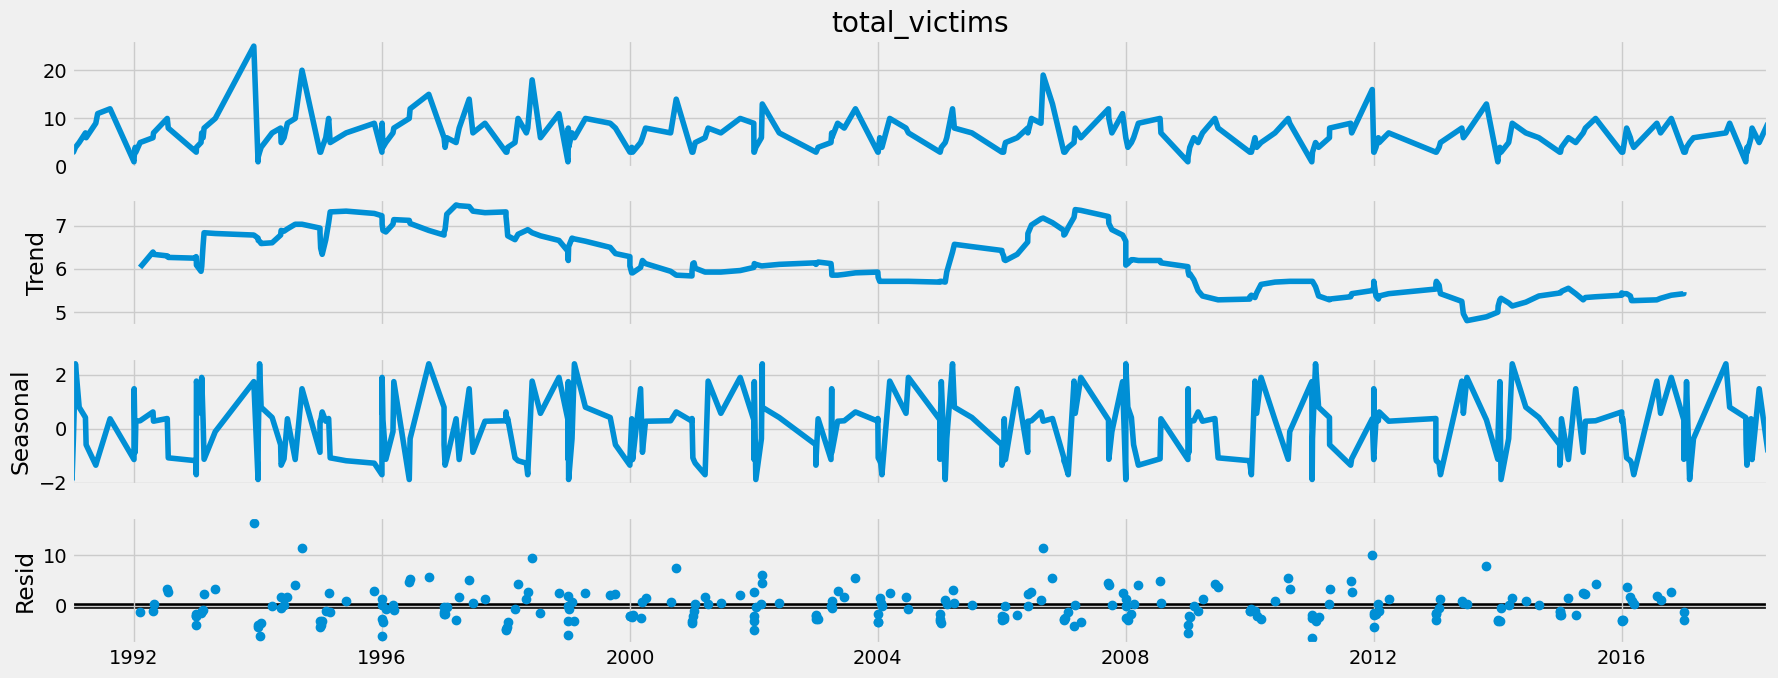

In [72]:
result.plot()

In [67]:
decomposition = sm.tsa.seasonal_decompose(victims_clean['total_victims'], model='additive',period=28)

In [68]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

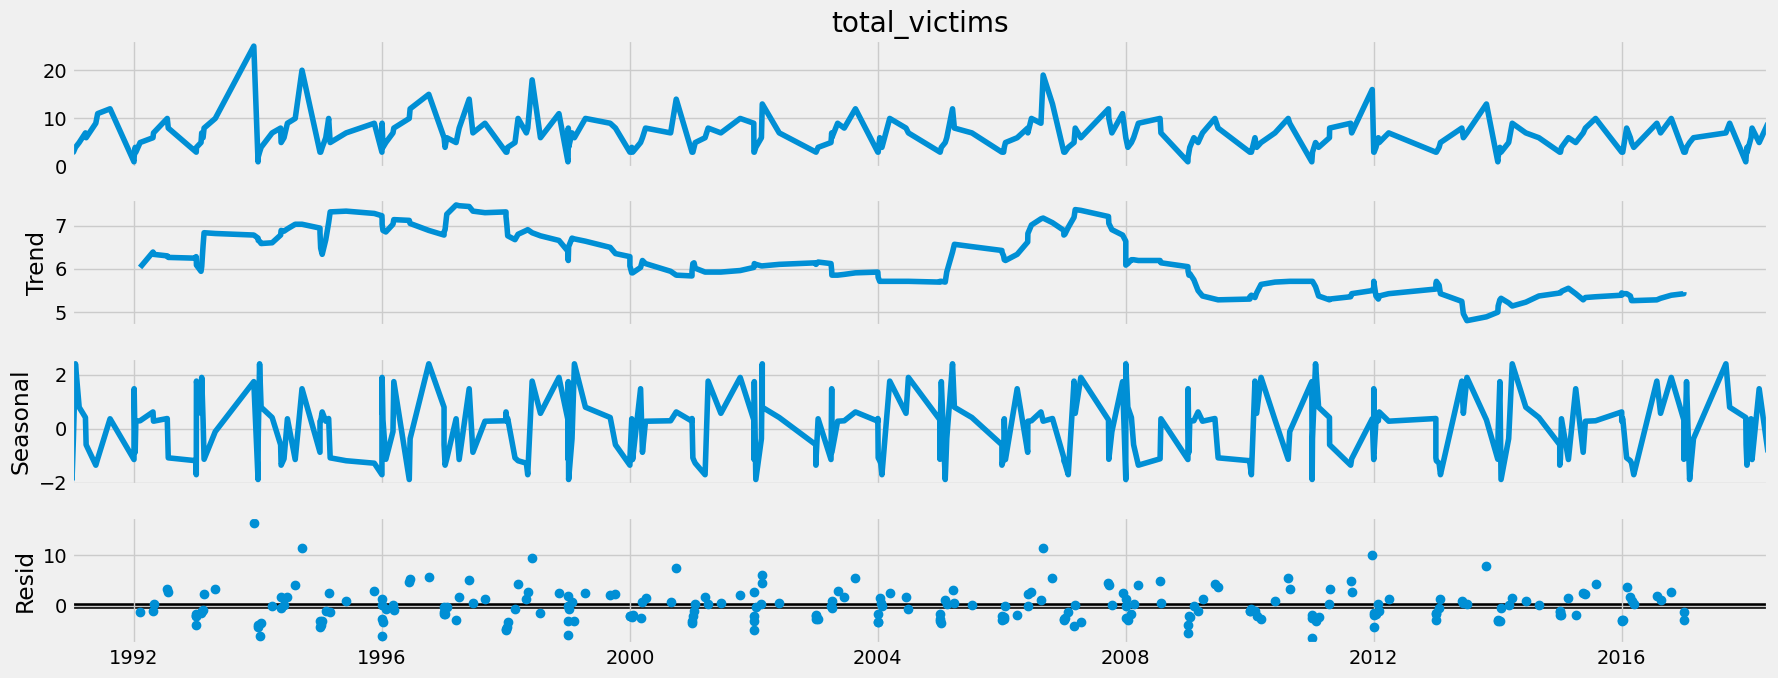

In [69]:
decomposition.plot()
plt.show()

##### As you can see, I created the same chart a couple different ways. The first line (chart) in the above figure is the data intself, this is known as the level. The trend of the data follows (2nd), and decreases and increased with the count of total hate crime victims. The third line (chart) is the seasonality, it is similar to the level plot and decreases and increased over time. One of my questions was to analyze how the data is affected by presidency and if it decreases/increased during the start and end of specific presidential terms. The final line (chart) is the noise, there isn't too much unexplained noise in the data from what I can see. There are a couple outliers but the data is mainly smooth and clustered around the middle line. 

### 04. Testing for Stationarity

In [73]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(victims_clean['total_victims'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.534063
p-value                          0.007154
Number of Lags Used             10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


##### -3.53... is smaller than all critical values at different confidence intervals, this means that we can reject the null hypothesis. In the case of the Dickey-Fuller test, the null hypothesis is the presence of a unit root (a random jump disproving stationarity). The conclusion is that there is a unit root and that the data has stationarity. However best practice is to check for autocorrelation.

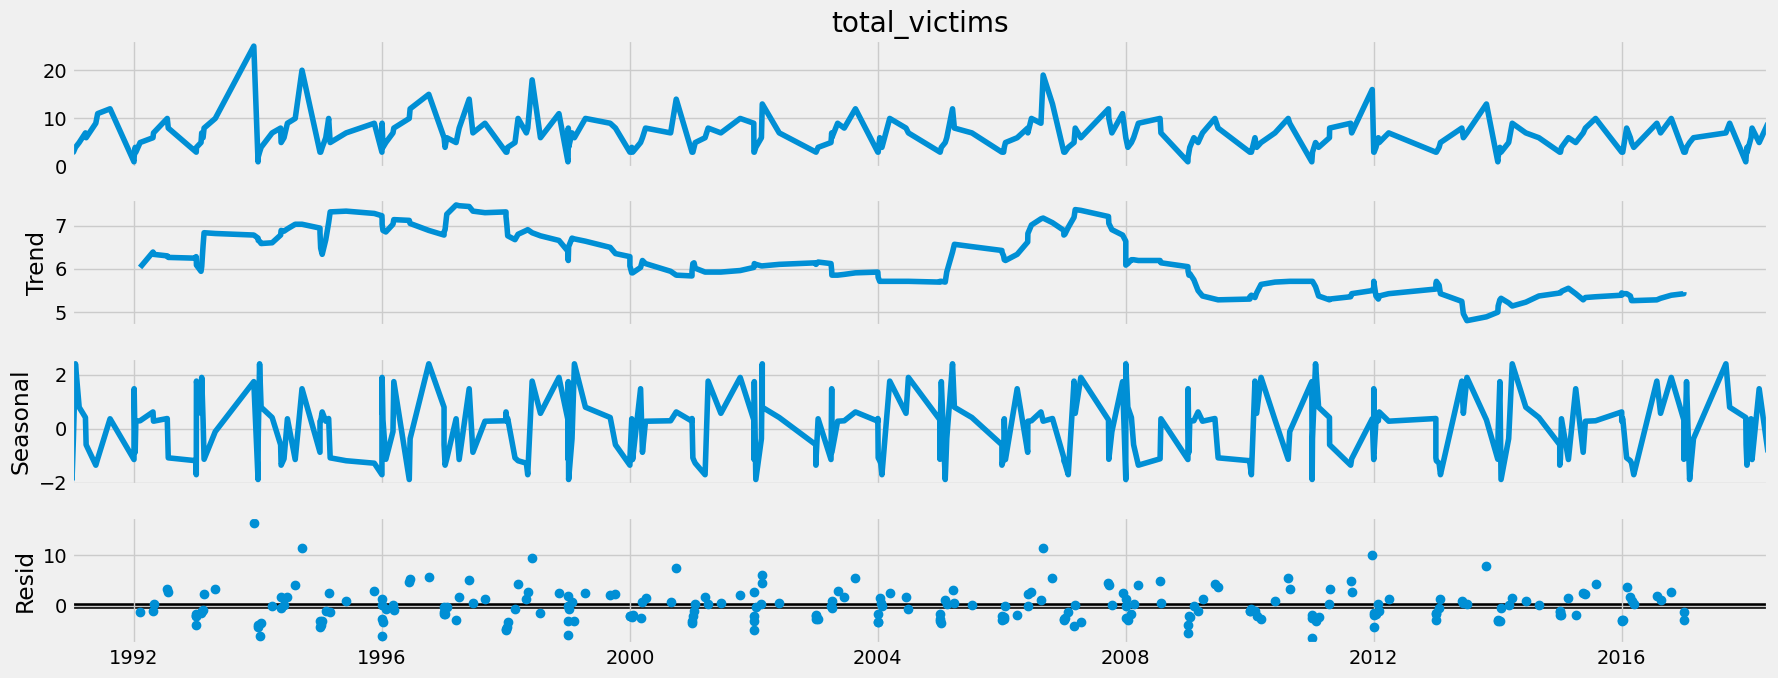

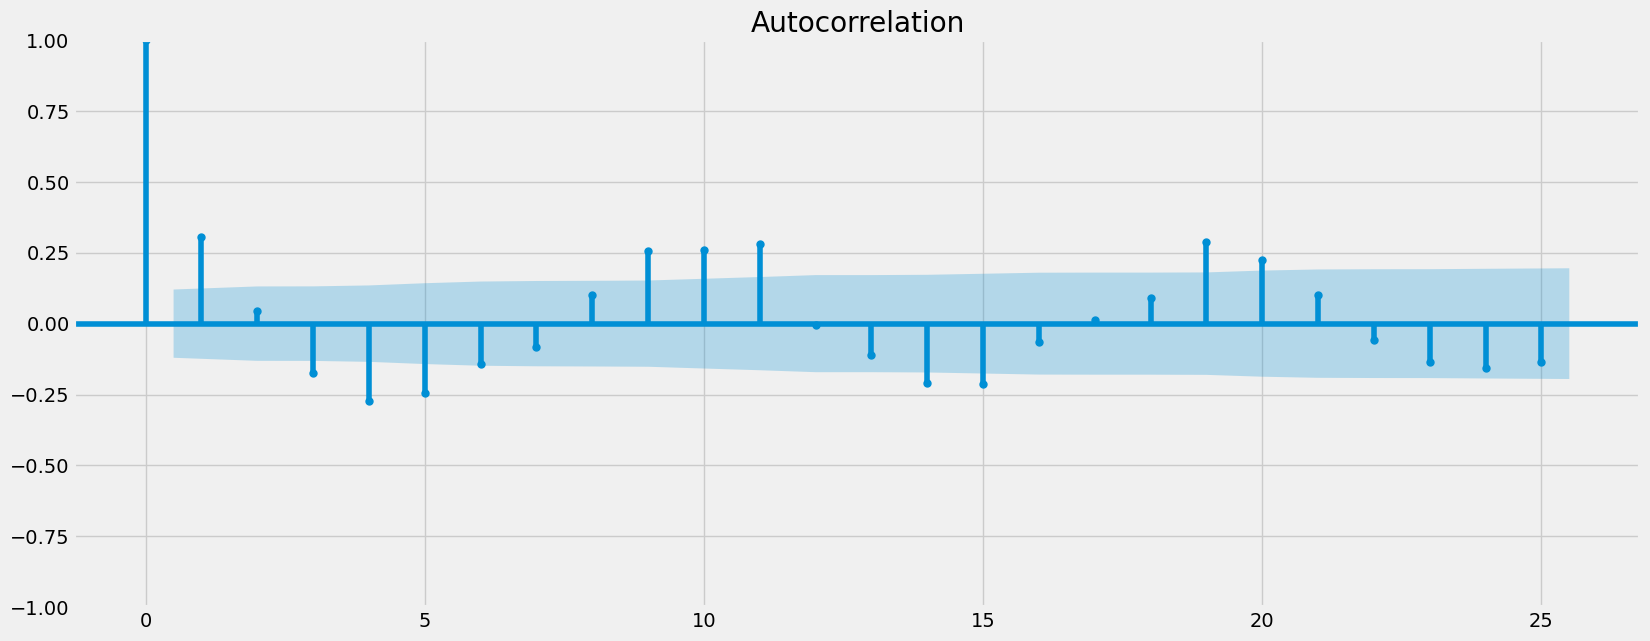

In [74]:
# Check plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import the autocorrelation and partial correlation plots

plot_acf(victims_clean)
plt.show()

##### Most lines do not go above the blue confidence interval, this means we dont have many lags that are significantly correlated with eachother disproving stationarity. This test further confirms there is stationarity with the data